In [2]:
import pandas as pd
import numpy as np
import os

# pd.set_option("display.max_rows", None, "display.max_columns", None) 
# pd.set_option('display.max_colwidth', None)

Function to extract GFCC's

In [3]:
import librosa
import sys
import os

from spafe.features.gfcc import gfcc
from spafe.utils.preprocessing import SlidingWindow

In [14]:
def extract_3d_gfcc(audio_path):

    # get audio
    waveform, sample_rate = librosa.load(audio_path)

    # # play audio
    # IPython.display.Audio(data=waveform,rate = sample_rate)

    # extract mfcc
    # extarcting 40 for efficeint net
    # gfccs = gfcc(sig = waveform,fs = sample_rate,num_ceps=224,window=SlidingWindow(0.00892, 0.004445, "hamming"),nfilts = 225)
    gfccs = gfcc(sig = waveform,fs = sample_rate,num_ceps=65,window=SlidingWindow(0.0325, 0.015, "hamming"),nfilts = 66)

    # extract delta mfcc
    delta_gfcc = librosa.feature.delta(gfccs,order=1)

    # extract delta-delta mfcc
    delta_delta_gfcc = librosa.feature.delta(gfccs,order=2)

    ## concatenate features along feature axis - along row - subject to change
    #gfcc_features = np.concatenate((gfccs,delta_gfcc,delta_delta_gfcc),axis = 0)

    # send three features
    gfcc_features = [gfccs,delta_gfcc,delta_delta_gfcc]

    return gfcc_features

arr = extract_3d_gfcc('../sample_to_onesec/upsamples_to_one_sec/adrso_002_1_cn_part_13.wav')
arr = np.array(arr)
print(arr.shape)
# u get 39x39 image

(3, 65, 65)


## Dataframe

In [15]:
data = pd.DataFrame(columns=['audio_path','subject','segment', 'sub_segment' ,'gfcc','delta_gfcc','delta_delta_gfcc','ad_or_not'])
data.info()

# dataframe cols
# path, subject ,segment , sub_segment, ad

dir_path = '../sample_to_onesec/upsamples_to_one_sec'
files = os.listdir(dir_path)
count = 0

for file in files:

    elems = []
    # 'audio_path','subject','segment','ad_or_not'

    # audio_path = os.path.join(dir_path,file)
    audio_path = dir_path + '/' + file
    # 1. audio_path
    elems.append(audio_path)


    parts = file.split('_')
    # sample_path = sample_to_onesec\upsamples_to_one_sec\adrso_002_1_cn_part_3.wav
    # sample_split = ['adrso', '002', '1', 'cn', 'part', '1.wav']
    # ['adrso' , subject , segment, ad/not, 'part', 'sub_segment' ]

    # segment - upsampling to 20-secs
    # sub-segment - upsampling to 1-sec

    subject = parts[1]
    # 2. subject
    elems.append(subject)

    segment = parts[2]
    # 3. segment
    elems.append(segment)

    sub_segment = parts[5].split('.')[0]
    # 4. sub_segment
    elems.append(sub_segment)

    # 5. add gfcc's
    gfcc_3d = extract_3d_gfcc(audio_path)

    # gfcc
    elems.append(gfcc_3d[0])

    # delta_gfcc
    elems.append(gfcc_3d[1])

    # delta_delta_gfcc
    elems.append(gfcc_3d[2])
   
    is_ad = parts[3].split('.')[0]
    if is_ad == 'ad':
        ad_or_not = 1
    elif is_ad == 'cn':
        ad_or_not = 0
    # 5. ad_or_not
    elems.append(ad_or_not)

    

    elems_ragged = np.asarray(elems,dtype= 'object')

    # print(elems_ragged)

    # add to data frame
    leng = len(data)
    data.loc[leng] = elems_ragged

    count += 1
    if count%5 == 0:
        print(count)
# data[630:650]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   audio_path        0 non-null      object
 1   subject           0 non-null      object
 2   segment           0 non-null      object
 3   sub_segment       0 non-null      object
 4   gfcc              0 non-null      object
 5   delta_gfcc        0 non-null      object
 6   delta_delta_gfcc  0 non-null      object
 7   ad_or_not         0 non-null      object
dtypes: object(8)
memory usage: 132.0+ bytes
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530

In [16]:
data.head()

,audio_path,subject,segment,sub_segment,gfcc,delta_gfcc,delta_delta_gfcc,ad_or_not
0,../sample_to_onesec/upsamples_to_one_sec/adrso...,002,1,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,../sample_to_onesec/upsamples_to_one_sec/adrso...,002,1,10,"[[0.5886036732538706, -0.6903327765750054, 0.5...","[[-0.020674385140233818, -0.020674385140233818...","[[0.019369933322143307, 0.019369933322143307, ...",0
2,../sample_to_onesec/upsamples_to_one_sec/adrso...,002,1,11,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,../sample_to_onesec/upsamples_to_one_sec/adrso...,002,1,12,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
4,../sample_to_onesec/upsamples_to_one_sec/adrso...,002,1,13,"[[0.07369640745426048, 0.023618852368907664, -...","[[-0.005303889218268371, -0.005303889218268371...","[[0.008574909097074276, 0.008574909097074276, ...",0


Find min and max of gfcc's

In [17]:
# min max of gfccs
# is normaliation a better way ?

data['gfcc'].loc[0]

min_val_gfcc , min_val_del_gfcc , min_val_del_2_gfcc = 100,100,100
max_val_gfcc, max_val_del_gfcc , max_val_del_2_gfcc = 0,0,0

for i in range(len(data)):
    min_val_gfcc = np.minimum( min_val_gfcc , data['gfcc'].loc[i].min() )
    max_val_gfcc = np.maximum( max_val_gfcc , data['gfcc'].loc[i].max() )

    min_val_del_gfcc = np.minimum( min_val_del_gfcc , data['delta_gfcc'].loc[i].min() )
    max_val_del_gfcc = np.maximum( max_val_del_gfcc , data['delta_gfcc'].loc[i].max() )

    min_val_del_2_gfcc = np.minimum( min_val_del_2_gfcc , data['delta_delta_gfcc'].loc[i].min() )
    # print(round(data['delta_delta_gfcc'].loc[i].min(),2))
    max_val_del_2_gfcc = np.maximum( max_val_del_2_gfcc , data['delta_delta_gfcc'].loc[i].max() )


print(f'gfcc\nmax:{round(max_val_gfcc,2)} \t min:{round(min_val_gfcc,2)}')
print(f'del_gfcc\nmax:{round(max_val_del_gfcc,2)} \t min:{round(min_val_del_gfcc,2)}')
print(f'del_del_gfcc\nmax:{round(max_val_del_2_gfcc,2)} \t min:{round(min_val_del_2_gfcc,2)}\n\n')


gfcc
max:5.36 	 min:-6.12
del_gfcc
max:0.31 	 min:-0.23
del_del_gfcc
max:0.22 	 min:-0.26




## Normalize gfcc's

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_subset = data[['gfcc', 'delta_gfcc', 'delta_delta_gfcc']]

train = []

count = 0

for i in range(len(data_subset)):

    a = data_subset.loc[i, 'gfcc']
    original_shape_a = a.shape
    reshaped_a = a.reshape( -1,1 )
    normalized_a = scaler.fit_transform( reshaped_a )
    new_a = normalized_a.reshape( original_shape_a )


    delta_a = data_subset.loc[i, 'delta_gfcc']
    original_shape_delta_a = delta_a.shape
    reshaped_delta_a = delta_a.reshape( -1,1 )
    normalized_delta_a = scaler.fit_transform( reshaped_delta_a )
    new_delta_a = normalized_delta_a.reshape( original_shape_delta_a )


    delta_delta_a = data_subset.loc[i, 'delta_delta_gfcc']
    original_shape_delta_delta_a = delta_delta_a.shape
    reshaped_delta_delta_a = delta_delta_a.reshape( -1,1 )
    normalized_delta_delta_a = scaler.fit_transform( reshaped_delta_delta_a )
    new_delta_delta_a = normalized_delta_delta_a.reshape( original_shape_delta_delta_a )

    all_gfccs = np.array([ new_a , new_delta_a , new_delta_delta_a ])

    train.append(all_gfccs)
    count += 1

    if count%5 == 0:
        print(count)



5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
1210
1215
1220

In [20]:


# data => X 
train= np.array(train)
print(f'Data shape : {train.shape}')

# labels => y
labels = data['ad_or_not'].values
print(f'Labels shape: {labels.shape}')

Data shape : (9720, 3, 65, 65)
Labels shape: (9720,)


In [21]:
import psutil

# Get the system memory information
mem_info = psutil.virtual_memory()

# Convert the available and total memory to GiB
available_memory_gib = mem_info.available / (1024 ** 3)
total_memory_gib = mem_info.total / (1024 ** 3)

print(f"Available memory: {available_memory_gib} GiB")
print(f"Total memory: {total_memory_gib} GiB")


Available memory: 6.876247406005859 GiB
Total memory: 15.893760681152344 GiB


In [87]:
# from sklearn.preprocessing import MinMaxScaler
# arr = np.array([[3,-1,-3],[1,2,2]])

# scaler = MinMaxScaler(feature_range=(0,1))

# arr = arr.reshape(-1,1)
# arr_2 = scaler.fit_transform(arr)
# arr_2 = arr_2.flatten()

# for i in arr_2:
#     print(i)


1.0
0.33333333333333337
0.0
0.6666666666666666
0.8333333333333333
0.8333333333333333


In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# a =  np.array([[3,-1,-3],[1,2,2]])
# original_shape_a = a.shape
# reshaped_a = a.reshape( -1,1 )
# normalized_a = scaler.fit_transform( reshaped_a )
# new_a = normalized_a.reshape( original_shape_a )
# print(a)
# print(new_a)

[[ 3 -1 -3]
 [ 1  2  2]]
[[1.         0.33333333 0.        ]
 [0.66666667 0.83333333 0.83333333]]


## Split data

1. Load data - done
2. Preprocess data - normalized - done
3. split dataset into train and test - current cell

In [22]:
print(f'Shape before : {train.shape}')

train_data_reshaped = np.transpose(train, (0, 2, 3, 1))

print(f'Shape after : {train_data_reshaped.shape}')

# (0, 2, 3, 1): This tuple specifies the desired order of dimensions. 
# It indicates that the first dimension (0) should remain unchanged, 
# the second dimension (3) should be moved to the third position, 
# the third dimension (39) should be moved to the fourth position, 
# and the fourth dimension (39) should be moved to the second position.

Shape before : (9720, 3, 65, 65)
Shape after : (9720, 65, 65, 3)


In [23]:

from sklearn.model_selection import train_test_split

X= train_data_reshaped
y = labels

# train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)

# train and validation
X_train, X_val, y_train, y_val = train_test_split( X_train , y_train, test_size=0.2, random_state = 42)

# class splits
unique, counts_train = np.unique(y_train,return_counts=True)
unique, counts_test = np.unique(y_test,return_counts=True)

print(f'class distriution in train dataset : {dict(zip(unique, counts_train))}')
print(f'class distriution in train dataset : {dict(zip(unique, counts_test))}')

class distriution in train dataset : {0: 2293, 1: 3150}
class distriution in train dataset : {0: 1218, 1: 1698}


# **CNN model**

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

### Build and Compile Model

In [28]:
model = Sequential()

model.add( Conv2D( 16, (3,3), activation='elu', input_shape = (65,65,3)) )
model.add( MaxPool2D((2,2)) )
model.add( Conv2D( 16,(3,3), activation='elu') )
model.add( MaxPool2D((2,2)) )
model.add( Conv2D( 16,(3,3), activation='elu') )
model.add( MaxPool2D((2,2)) )
model.add( Conv2D( 16,(3,3), activation='elu') )
model.add( Flatten() )
# model.add( Dense(1024, activation='elu') )
# model.add( Dense(512, activation='elu') )
model.add( Dense(256, activation='elu') )
model.add( Dropout(0.7) )

# model.add( Dense(128, activation='elu') )
model.add( Dense(64, activation='elu') )
model.add( Dropout(0.7) )

model.add( Dense(32, activation='elu') )
model.add( Dropout(0.7) )

model.add( Dense(16, activation='elu') )
model.add( Dropout(0.5) )

# model.add( Dense(8, activation='elu') )
model.add( Dense(4, activation='elu') )
model.add( Dense(1, activation= 'sigmoid') )


# summary
print(model.summary())

# compile 
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 63, 63, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)        

### Fit model

In [30]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

# fit
model_history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose="auto",
    validation_data= (X_val, y_val))


Epoch 1/100
171/171 [==============================] - 10s 57ms/step - loss: 0.6968 - accuracy: 0.5392 - val_loss: 0.6763 - val_accuracy: 0.5966
Epoch 2/100
171/171 [==============================] - 9s 54ms/step - loss: 0.6849 - accuracy: 0.5607 - val_loss: 0.6744 - val_accuracy: 0.5966
Epoch 3/100
171/171 [==============================] - 9s 53ms/step - loss: 0.6807 - accuracy: 0.5743 - val_loss: 0.6704 - val_accuracy: 0.5966
Epoch 4/100
171/171 [==============================] - 9s 52ms/step - loss: 0.6828 - accuracy: 0.5694 - val_loss: 0.6687 - val_accuracy: 0.5966
Epoch 5/100
171/171 [==============================] - 10s 56ms/step - loss: 0.6786 - accuracy: 0.5765 - val_loss: 0.6630 - val_accuracy: 0.5966
Epoch 6/100
171/171 [==============================] - 9s 54ms/step - loss: 0.6746 - accuracy: 0.5776 - val_loss: 0.6574 - val_accuracy: 0.5929
Epoch 7/100
171/171 [==============================] - 8s 50ms/step - loss: 0.6743 - accuracy: 0.5811 - val_loss: 0.6664 - val_accurac

### Evaluate model on Test

In [31]:
# evaluate on test
metrics = model.evaluate(
    x= X_test,
    y= y_test,
    verbose="auto"
)

metrics_names = np.array(['Test loss','Test accuracy'])
metrics_dict = dict(zip(metrics_names,metrics))
print(metrics_dict)

92/92 [==============================] - 1s 11ms/step - loss: 1.4498 - accuracy: 0.5758
{'Test loss': 1.4498176574707031, 'Test accuracy': 0.5757887363433838}


### Plot loss and accuracy of model on train and test data

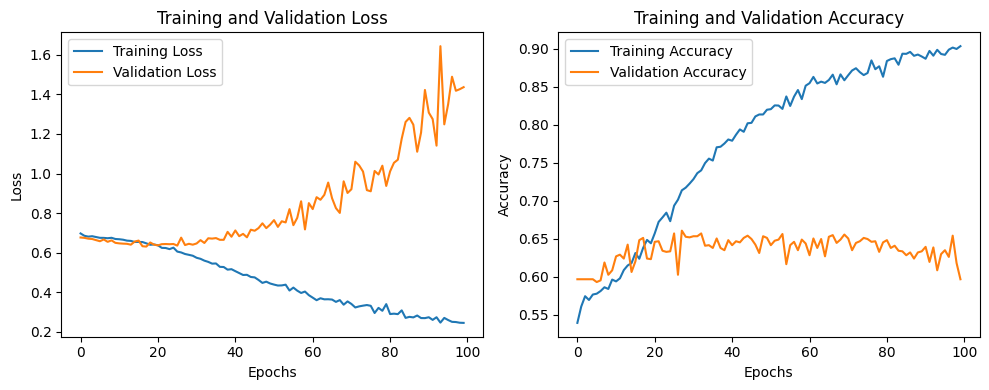

In [32]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()